In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
plt.style.use('ggplot')

train = pd.read_csv('../../data/train.csv', index_col=0)
train.columns
train.shape

MSZoningMask = (train.MSZoning=='A') | (train.MSZoning=='C') | (train.MSZoning=='I') | (train.MSZoning=='C (all)')
train = train[~MSZoningMask]


In [4]:
train = train.fillna(value=0)

In [5]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1500)
train.sample(10)
train.shape

(1450, 80)

In [6]:
num_vals = [x for x in train.columns if train[x].dtype == 'int64' or train[x].dtype == 'float64'] 
num_df = train[num_vals]
num_df = num_df.iloc[:,1:]
#num_df.isnull().sum()



In [7]:
num_df.describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count   1450.00000    1450.000000  1450.000000  1450.000000  1450.000000   
mean      57.54000   10523.831724     6.114483     5.582069  1971.593103   
std       34.71992   10012.185355     1.372860     1.107330    30.022696   
min        0.00000    1300.000000     1.000000     1.000000  1872.000000   
25%       41.25000    7544.500000     5.000000     5.000000  1954.000000   
50%       63.00000    9496.000000     6.000000     5.000000  1973.000000   
75%       79.00000   11613.500000     7.000000     6.000000  2001.000000   
max      313.00000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   1450.000000  1450.000000  1450.000000  1450.000000  1450.000000   
mean    1985.049655   103.828276   445.162759    46.870345   567.375862   
std       20.552319   181.150114   456.353871   161.828458   442.584978   
min     1950.000000     0.000000     0.000000     0.000000     0.000000   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000   
50%     1994.000000     0.000000   384.000000     0.000000   475.000000   
75%     2004.000000   166.000000   713.750000     0.000000   808.000000   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1450.000000  1450.000000  1450.000000   1450.000000  1450.000000   
mean   1059.408966  1164.773103   347.394483      5.531034  1517.698621   
std     439.207322   386.646095   437.094261     46.932966   525.154207   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     796.000000   882.500000     0.000000      0.000000  1131.250000   
50%     992.000000  1088.000000     0.000000      0.000000  1466.000000   
75%    1301.500000  1392.000000   728.000000      0.000000  1779.000000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1450.000000   1450.000000  1450.000000  1450.000000   1450.000000   
mean       0.427586      0.057241     1.568966     0.384828      2.870345   
std        0.519394      0.238249     0.549549     0.503450      0.814645   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count   1450.000000   1450.000000  1450.000000  1450.000000  1450.000000   
mean       1.046207      6.522069     0.616552  1870.826207     1.770345   
std        0.219643      1.625324     0.644991   449.875634     0.745136   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
25%        1.000000      5.000000     0.000000  1958.000000     1.000000   
50%        1.000000      6.000000     1.000000  1977.000000     2.000000   
75%        1.000000      7.000000     1.000000  2001.000000     2.000000   
max        3.000000     14.000000     3.000000  2010.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1450.000000  1450.000000  1450.000000    1450.000000  1450.000000   
mean    473.277931    94.826897    46.537931      21.536552     3.433103   
std     212.687621   125.560863    65.222761      60.838826    29.416948   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     336.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000

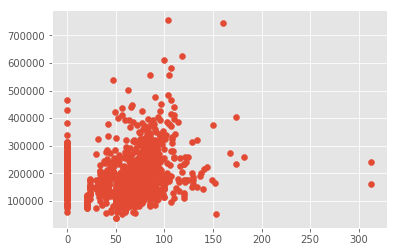

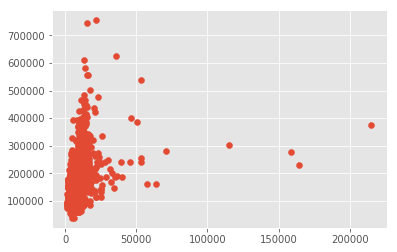

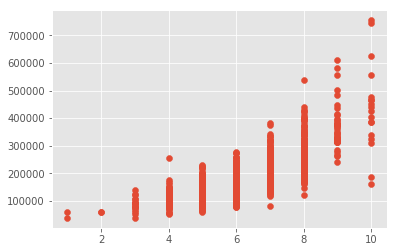

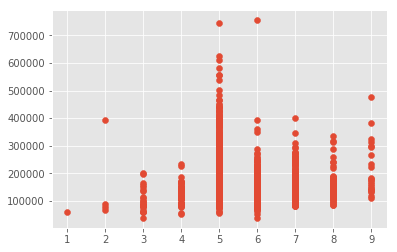

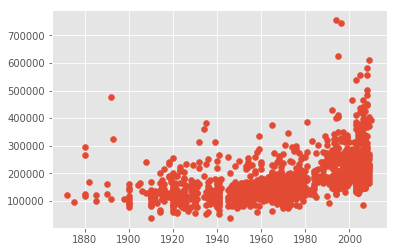

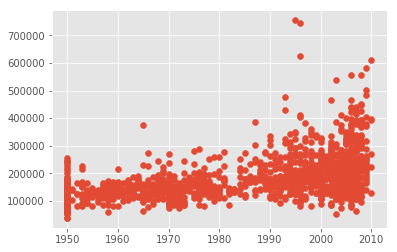

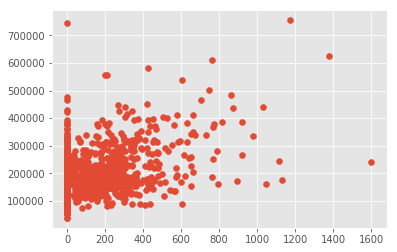

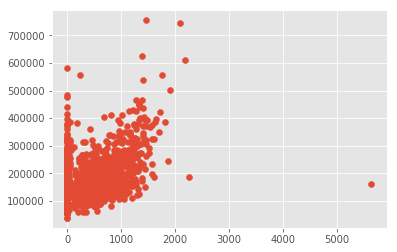

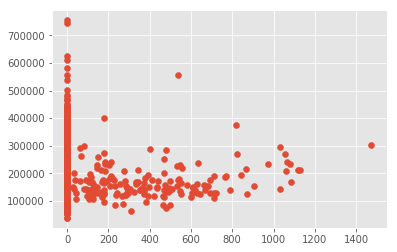

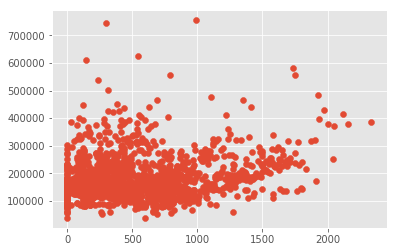

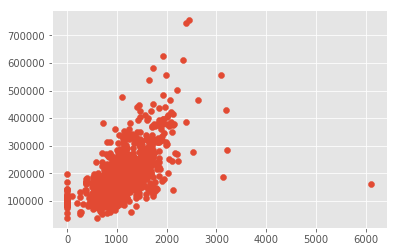

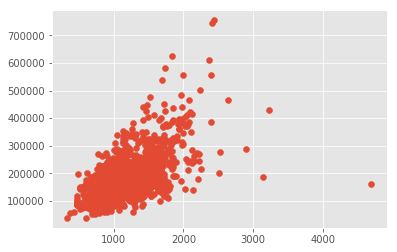

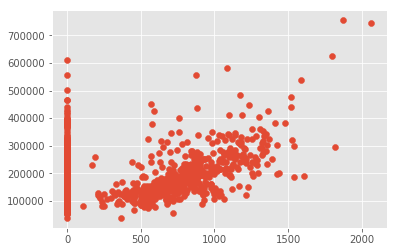

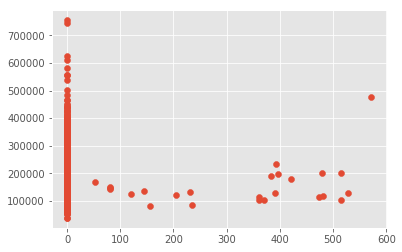

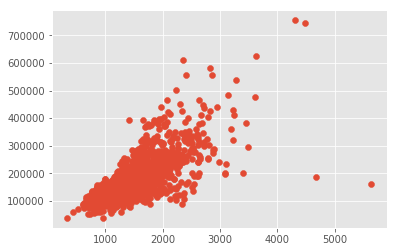

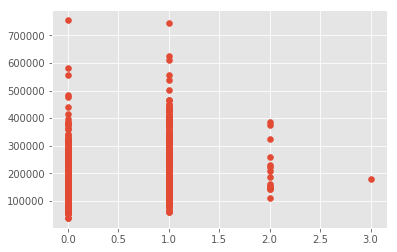

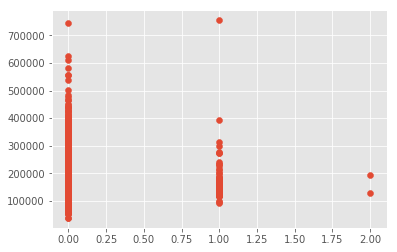

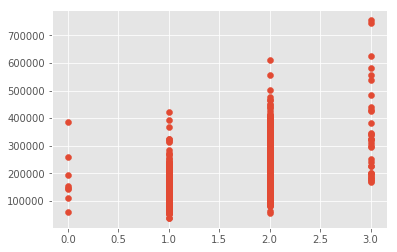

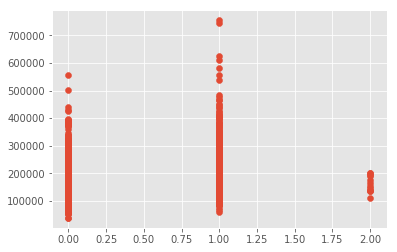

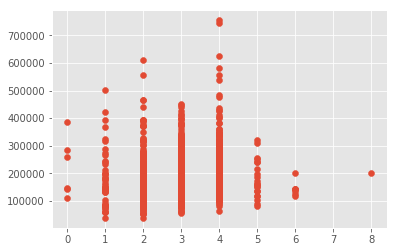

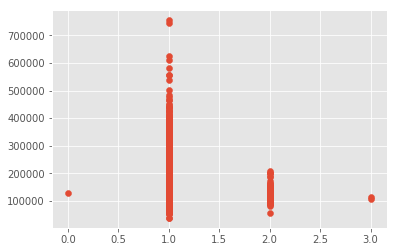

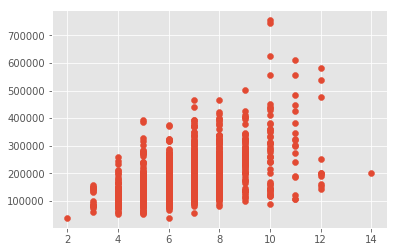

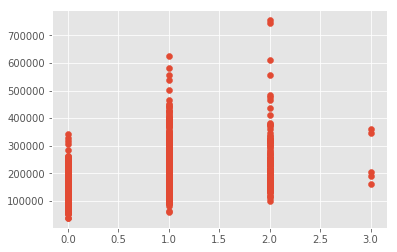

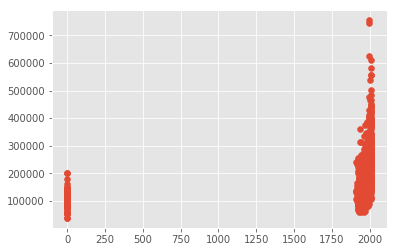

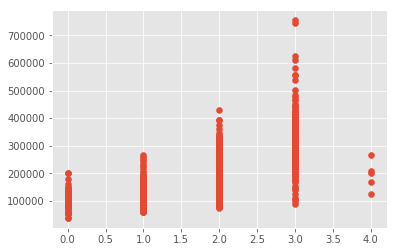

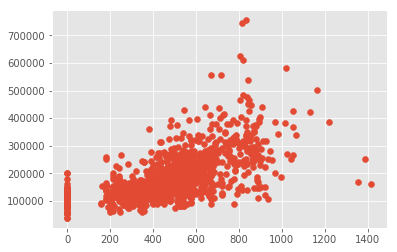

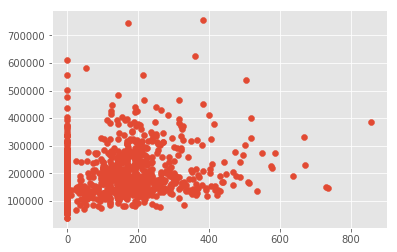

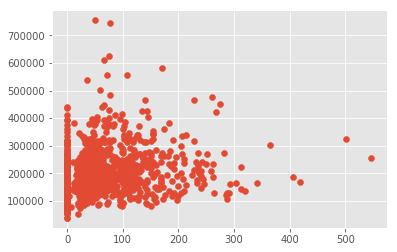

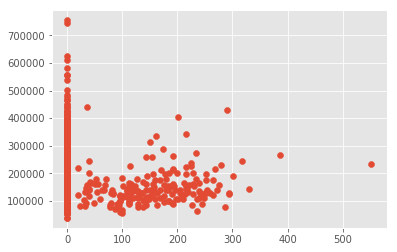

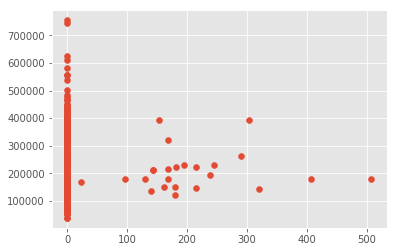

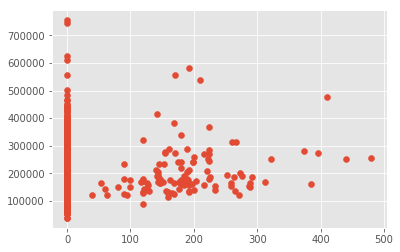

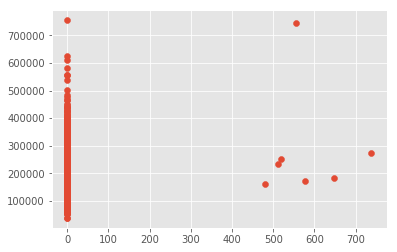

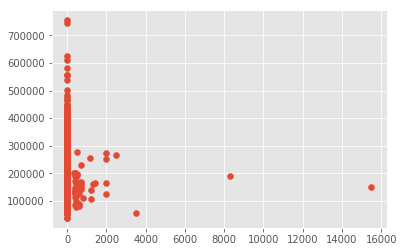

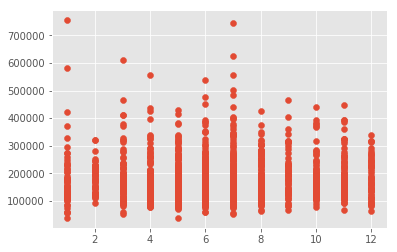

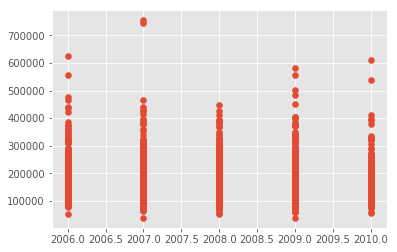

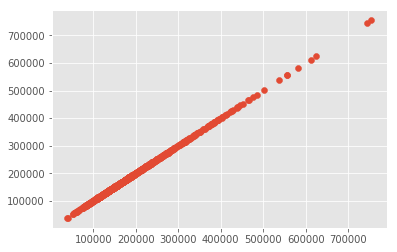

In [6]:
for col in num_df.columns:
    plt.scatter(num_df[col], num_df['SalePrice'])
    plt.show()
    

In [7]:
# split_size = 5
# pd.plotting.scatter_matrix(num_df.iloc[:, 0:split_size], alpha=0.2, diagonal='kde', grid=True, figsize = (10,10))
# plt.show()

In [8]:
# pd.plotting.scatter_matrix(num_df.iloc[:,split_size:split_size*2], alpha=0.2, diagonal='kde', grid=True, figsize = (10,10))
# plt.show()

In [9]:
# pd.plotting.scatter_matrix(num_df.iloc[:,split_size*2:split_size*3], alpha=0.2, diagonal='kde', grid=True, figsize = (10,10))
# plt.show()

In [10]:
# pd.plotting.scatter_matrix(num_df.iloc[:,split_size*3:split_size*4], alpha=0.2, diagonal='kde', grid=True, figsize = (10,10))
# plt.show()

In [11]:
# pd.plotting.scatter_matrix(num_df.iloc[:,split_size*4:split_size*5], alpha=0.2, diagonal='kde', grid=True, figsize = (10,10))
# plt.show()

In [12]:
# pd.plotting.scatter_matrix(num_df.iloc[:,split_size*5:split_size*6], alpha=0.2, diagonal='kde', grid=True, figsize = (10,10))
# plt.show()

In [11]:
cat_values = [x for x in train.columns if x not in num_df.columns]
cat_df = train[cat_values]
#cat_df.isnull().sum()

In [12]:
cat_df.iloc[:,0:(len(cat_values))]



MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
Id                                                                      
1             60       RL   Pave     0      Reg         Lvl    AllPub   
2             20       RL   Pave     0      Reg         Lvl    AllPub   
3             60       RL   Pave     0      IR1         Lvl    AllPub   
4             70       RL   Pave     0      IR1         Lvl    AllPub   
5             60       RL   Pave     0      IR1         Lvl    AllPub   
6             50       RL   Pave     0      IR1         Lvl    AllPub   
7             20       RL   Pave     0      Reg         Lvl    AllPub   
8             60       RL   Pave     0      IR1         Lvl    AllPub   
9             50       RM   Pave     0      Reg         Lvl    AllPub   
10           190       RL   Pave     0      Reg         Lvl    AllPub   
11            20       RL   Pave     0      Reg         Lvl    AllPub   
12            60       RL   Pave     0      IR1         Lvl    AllPub   
13            20       RL   Pave     0      IR2         Lvl    AllPub   
14            20       RL   Pave     0      IR1         Lvl    AllPub   
15            20       RL   Pave     0      IR1         Lvl    AllPub   
16            45       RM   Pave     0      Reg         Lvl    AllPub   
17            20       RL   Pave     0      IR1         Lvl    AllPub   
18            90       RL   Pave     0      Reg         Lvl    AllPub   
19            20       RL   Pave     0      Reg         Lvl    AllPub   
20            20       RL   Pave     0      Reg         Lvl    AllPub   
21            60       RL   Pave     0      IR1         Lvl    AllPub   
22            45       RM   Pave  Grvl      Reg         Bnk    AllPub   
23            20       RL   Pave     0      Reg         Lvl    AllPub   
24           120       RM   Pave     0      Reg         Lvl    AllPub   
25            20       RL   Pave     0      IR1         Lvl    AllPub   
26            20       RL   Pave     0      Reg         Lvl    AllPub   
27            20       RL   Pave     0      Reg         Lvl    AllPub   
28            20       RL   Pave     0      Reg         Lvl    AllPub   
29            20       RL   Pave     0      IR1         Lvl    AllPub   
30            30       RM   Pave     0      IR1         Lvl    AllPub   
32            20       RL   Pave     0      IR1         Lvl    AllPub   
33            20       RL   Pave     0      Reg         Lvl    AllPub   
34            20       RL   Pave     0      IR1         Lvl    AllPub   
35           120       RL   Pave     0      Reg         Lvl    AllPub   
36            60       RL   Pave     0      Reg         Lvl    AllPub   
37            20       RL   Pave     0      Reg         Lvl    AllPub   
38            20       RL   Pave     0      Reg         Lvl    AllPub   
39            20       RL   Pave     0      Reg         Lvl    AllPub   
40            90       RL   Pave     0      Reg         Lvl    AllPub   
41            20       RL   Pave     0      Reg         Lvl    AllPub   
42            20       RL   Pave     0      Reg         Lvl    AllPub   
43            85       RL   Pave     0      IR1         Lvl    AllPub   
44            20       RL   Pave     0      IR1         Lvl    AllPub   
45            20       RL   Pave     0      Reg         Lvl    AllPub   
46           120       RL   Pave     0      Reg         Lvl    AllPub   
47            50       RL   Pave     0      IR1         Lvl    AllPub   
48            20       FV   Pave     0      Reg         Lvl    AllPub   
49           190       RM   Pave     0      Reg         Lvl    AllPub   
50            20       RL   Pave     0      Reg         Lvl    AllPub   
51            60       RL   Pave     0      IR2         Lvl    AllPub   
52            50       RM   Pave     0      Reg         Lvl    AllPub   
53            90       RM   Grvl     0      IR2         Bnk    AllPub   
54            20       RL   Pave     0      IR1         Low    A

In [13]:
train.corr()['SalePrice']

MSSubClass      -0.087487
LotFrontage      0.214273
LotArea          0.264715
OverallQual      0.789031
OverallCond     -0.089084
YearBuilt        0.517602
YearRemodAdd     0.501186
MasVnrArea       0.471056
BsmtFinSF1       0.384475
BsmtFinSF2      -0.014145
BsmtUnfSF        0.216152
TotalBsmtSF      0.612088
1stFlrSF         0.603300
2ndFlrSF         0.319774
LowQualFinSF    -0.018755
GrLivArea        0.708658
BsmtFullBath     0.224054
BsmtHalfBath    -0.017561
FullBath         0.556674
HalfBath         0.280882
BedroomAbvGr     0.162008
KitchenAbvGr    -0.137825
TotRmsAbvGrd     0.533355
Fireplaces       0.463264
GarageYrBlt      0.258923
GarageCars       0.642135
GarageArea       0.629831
WoodDeckSF       0.320770
OpenPorchSF      0.329491
EnclosedPorch   -0.120765
3SsnPorch        0.043807
ScreenPorch      0.110540
PoolArea         0.092396
MiscVal         -0.021052
MoSold           0.051987
YrSold          -0.025391
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [16]:
train.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.215415 -0.139725     0.028891    -0.063504   
LotFrontage     -0.215415     1.000000  0.100273     0.183681    -0.049826   
LotArea         -0.139725     0.100273  1.000000     0.106457    -0.006074   
OverallQual      0.028891     0.183681  0.106457     1.000000    -0.107874   
OverallCond     -0.063504    -0.049826 -0.006074    -0.107874     1.000000   
YearBuilt        0.030056     0.041029  0.012958     0.567392    -0.390446   
YearRemodAdd     0.035989     0.081961  0.013475     0.544850     0.067475   
MasVnrArea       0.023617     0.106697  0.103071     0.405799    -0.130376   
BsmtFinSF1      -0.074762     0.079165  0.214794     0.235139    -0.053095   
BsmtFinSF2      -0.065991    -0.008637  0.111037    -0.062980     0.038818   
BsmtUnfSF       -0.139862     0.159562 -0.003035     0.313101    -0.135607   
TotalBsmtSF     -0.242933     0.239862  0.261034     0.536622    -0.177514   
1stFlrSF        -0.256336     0.247524  0.299984     0.472004    -0.152497   
2ndFlrSF         0.304606     0.044531  0.051568     0.295153     0.025345   
LowQualFinSF     0.049734     0.042045  0.006429    -0.016250     0.050366   
GrLivArea        0.069245     0.223062  0.264359     0.591722    -0.086680   
BsmtFullBath     0.004554     0.012828  0.158232     0.107451    -0.057456   
BsmtHalfBath    -0.011513    -0.027684  0.049121    -0.043259     0.116901   
FullBath         0.127755     0.123610  0.126324     0.544777    -0.206639   
HalfBath         0.178640    -0.011265  0.013691     0.270713    -0.066594   
BedroomAbvGr    -0.030009     0.147850  0.120122     0.091649     0.004918   
KitchenAbvGr     0.274877     0.035006 -0.017014    -0.189207    -0.090796   
TotRmsAbvGrd     0.034751     0.223205  0.190489     0.426924    -0.064277   
Fireplaces      -0.049409     0.046450  0.271941     0.391760    -0.030312   
GarageYrBlt     -0.084350     0.023311  0.072148     0.286571    -0.016690   
GarageCars      -0.042209     0.166719  0.154124     0.602533    -0.194190   
GarageArea      -0.100045     0.201015  0.179251     0.570620    -0.158068   
WoodDeckSF      -0.012677    -0.015127  0.171632     0.234394    -0.008204   
OpenPorchSF     -0.002789     0.072127  0.087333     0.320894    -0.034037   
EnclosedPorch   -0.011016     0.025923 -0.016954    -0.104417     0.079229   
3SsnPorch       -0.044032     0.023823  0.020349     0.029411     0.025010   
ScreenPorch     -0.030057     0.023599  0.043435     0.062759     0.053216   
PoolArea         0.008308     0.114483  0.077652     0.065112    -0.002421   
MiscVal         -0.007172    -0.060943  0.037468    -0.030910     0.069996   
MoSold          -0.015808     0.017440  0.001500     0.078088     0.003308   
YrSold          -0.019356    -0.013954 -0.013579    -0.024962     0.046202   
SalePrice       -0.087487     0.214273  0.264715     0.789031    -0.089084   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.030056      0.035989    0.023617   -0.074762   -0.065991   
LotFrontage     0.041029      0.081961    0.106697    0.079165   -0.008637   
LotArea         0.012958      0.013475    0.103071    0.214794    0.111037   
OverallQual     0.567392      0.544850    0.405799    0.235139   -0.062980   
OverallCond    -0.390446      0.067475   -0.130376   -0.053095    0.038818   
YearBuilt       1.000000      0.590105    0.308690    0.248222   -0.052726   
YearRemodAdd    0.590105      1.000000    0.173008    0.123137   -0.070913   
MasVnrArea      0.308690      0.173008    1.000000    0.260390   -0.072568   
BsmtFinSF1      0.248222      0.123137    0.260390    1.000000   -0.051244   
BsmtFinSF2     -0.052726     -0.070913   -0.072568   -0.051244    1.000000   
BsmtUnfSF       0.150407      0.182766    0.114022   -0.494616   -0.209824   
TotalBsmtSF     0.390050      0.285987    0.358716    0.521739    0.103774   
1stFlrSF        0.277341      0.2336

In [17]:
# correlations=train.corr()

# attrs = correlations.iloc[:-1,:-1] 


# threshold = .4
# rel_corrs = (attrs[abs(attrs) > threshold][attrs != 1]).unstack().to_dict()

# unique_corrs = pd.DataFrame(
#     list(set([(tuple(sorted(key)), rel_corrs[key]) 
    
#     for key in rel_corrs])), 
#         columns=['Attribute Pair', 'Correlation'])


# # absolute value and sort
# unique_corrs = unique_corrs.iloc[abs(unique_corrs['Correlation']).argsort()]

# unique_corrs


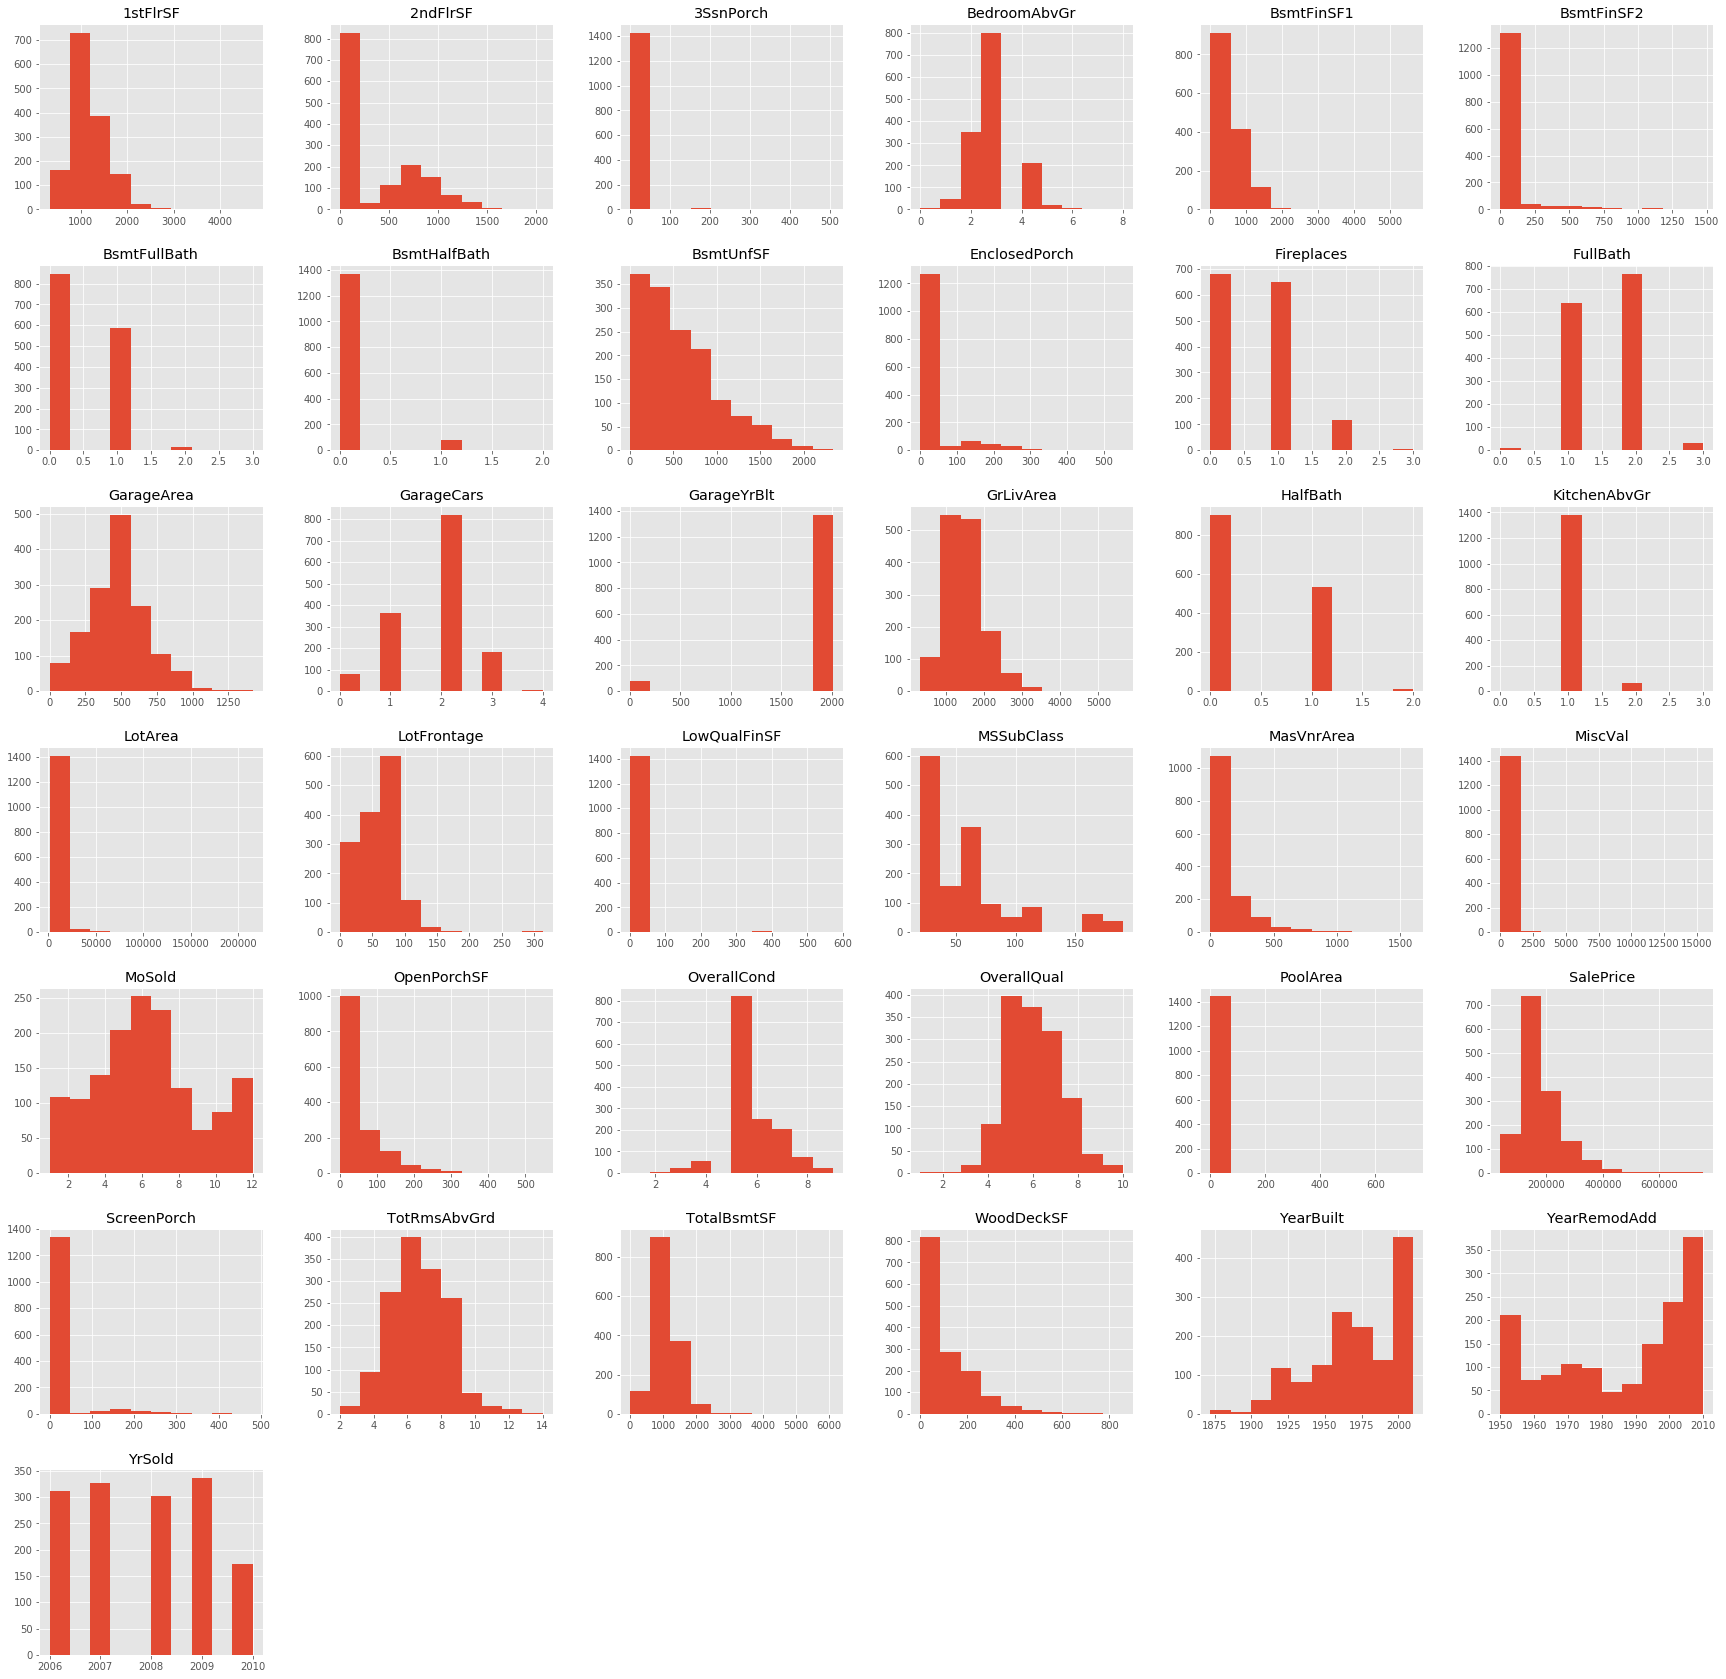

In [18]:
train.hist(figsize=(30,30))

plt.show()

In [19]:
unf_count = train[train['BsmtUnfSF']>0]
len(unf_count)



1333

In [20]:
def make_num(val):
    new_list = []
    if val == 'Ex':
        num = 5
    elif val == 'Gd':
        num = 4
    elif val == 'TA':
        num = 3
    elif val == 'Fa':
        num = 2
    elif val == 'Po':
        num = 1
    else:
        num = 0
    return int(num)

new_dict = {'Kitchen':0, 'Fireplace': 0, 'GarageQ': 0, 'GarageC':0, 'ExterQ': 0, 'ExterC':0, 'BsmtQ':0, 
            'BsmtC':0, 'HeatingQ': 0, "PoolQ": 0}

name_list = list(new_dict.keys())

orig_list = ["KitchenQual", 'FireplaceQu', 'GarageQual', 'GarageCond', 
 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
'PoolQC']

i=0
for thing in orig_list:  
    new_list = list(map(make_num,train[thing]))
    new_dict[name_list[i]] = new_list
    
    i+=1
    
new_df = pd.DataFrame(new_dict)


In [21]:
house = pd.concat([train.reset_index(), new_df], sort=True, axis=1)
house = house.drop('Id', axis=1)



In [22]:
# for i in cat_df.columns:
#     print(i)
#     print (cat_df[i].value_counts())
    

In [23]:
nosecond = train[train['2ndFlrSF']!=0]


In [24]:
nosecond.corr()['SalePrice']

MSSubClass      -0.254667
LotFrontage      0.247595
LotArea          0.284283
OverallQual      0.741685
OverallCond     -0.054456
YearBuilt        0.453938
YearRemodAdd     0.448566
MasVnrArea       0.461845
BsmtFinSF1       0.394168
BsmtFinSF2       0.007736
BsmtUnfSF        0.171141
TotalBsmtSF      0.597651
1stFlrSF         0.603710
2ndFlrSF         0.672916
LowQualFinSF     0.021357
GrLivArea        0.735356
BsmtFullBath     0.262475
BsmtHalfBath    -0.006476
FullBath         0.535389
HalfBath         0.348139
BedroomAbvGr     0.233475
KitchenAbvGr    -0.176085
TotRmsAbvGrd     0.533024
Fireplaces       0.455527
GarageYrBlt      0.234438
GarageCars       0.643792
GarageArea       0.638453
WoodDeckSF       0.333980
OpenPorchSF      0.283064
EnclosedPorch   -0.160424
3SsnPorch        0.014324
ScreenPorch      0.110882
PoolArea         0.149257
MiscVal         -0.023677
MoSold           0.026175
YrSold          -0.066299
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [25]:
correlations=nosecond.corr()

attrs = correlations.iloc[:-1,:-1] 
attrs


threshold = -10
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

Attribute Pair  Correlation
284       (GarageArea, GarageCars)     0.880463
239          (1stFlrSF, GrLivArea)     0.878946
355        (1stFlrSF, TotalBsmtSF)     0.811182
584          (2ndFlrSF, GrLivArea)     0.801363
603      (GrLivArea, TotRmsAbvGrd)     0.765653
347       (GrLivArea, TotalBsmtSF)     0.741608
627       (2ndFlrSF, TotRmsAbvGrd)     0.660959
466      (BsmtFinSF1, TotalBsmtSF)     0.651468
410   (BedroomAbvGr, TotRmsAbvGrd)     0.640658
36      (BsmtFinSF1, BsmtFullBath)     0.628335
248       (1stFlrSF, TotRmsAbvGrd)     0.627370
18       (GarageCars, OverallQual)     0.588567
33            (2ndFlrSF, FullBath)     0.580807
307      (GarageCars, GarageYrBlt)     0.576646
605      (GarageArea, OverallQual)     0.575915
407          (HalfBath, YearBuilt)     0.569841
579       (GrLivArea, OverallQual)     0.567318
308        (GarageArea, GrLivArea)     0.566640
98       (YearBuilt, YearRemodAdd)     0.558771
432          (FullBath, GrLivArea)     0.543086
280        (2ndFlrSF, OverallQual)     0.542514
80          (1stFlrSF, BsmtFinSF1)     0.541229
450        (GarageCars, YearBuilt)     0.540272
510      (GarageArea, GarageYrBlt)     0.524724
523       (OverallQual, YearBuilt)     0.524434
65          (2ndFlrSF, GarageArea)     0.516121
384         (2ndFlrSF, GarageCars)     0.515846
396        (BsmtFinSF1, BsmtUnfSF)    -0.506069
494     (OverallQual, TotalBsmtSF)     0.505180
321    (OverallQual, YearRemodAdd)     0.499868
488        (GarageCars, GrLivArea)     0.489820
471       (2ndFlrSF, BedroomAbvGr)     0.481814
133         (FullBath, GarageCars)     0.481293
589      (BedroomAbvGr, GrLivArea)     0.481150
333         (1stFlrSF, GarageArea)     0.478387
409      (GarageArea, TotalBsmtSF)     0.478021
401       (OverallCond, YearBuilt)    -0.476336
229          (FullBath, YearBuilt)     0.473159
509        (GarageArea, YearBuilt)     0.472951
580         (FullBath, GarageArea)     0.472322
447    (TotRmsAbvGrd, TotalBsmtSF)     0.471839
56        (FullBath, TotRmsAbvGrd)     0.466449
550        (BsmtFinSF1, GrLivArea)     0.462111
458        (Fireplaces, GrLivArea)     0.455719
585         (1stFlrSF, Fireplaces)     0.453860
210        (FullBath, OverallQual)     0.453742
592        (1stFlrSF, OverallQual)     0.449791
456      (BsmtFullBath, BsmtUnfSF)    -0.434833
167           (1stFlrSF, 2ndFlrSF)     0.434146
47      (EnclosedPorch, YearBuilt)    -0.427036
554       (FullBath, YearRemodAdd)     0.423025
253        (2ndFlrSF, TotalBsmtSF)     0.419356
165        (GrLivArea, MasVnrArea)     0.403000
334            (1stFlrSF, LotArea)     0.394076
20       (Fireplaces, TotalBsmtSF)     0.393170
238      (Fireplaces, OverallQual)     0.391066
338     (GarageCars, YearRemodAdd)     0.388392
93         (HalfBath, OverallQual)     0.387007
271      (MasVnrArea, OverallQual)     0.383309
137      (MasVnrArea, TotalBsmtSF)     0.380917
613      (GarageCars, TotalBsmtSF)     0.379242
441         (LotArea, TotalBsmtSF)     0.377725
323           (1stFlrSF, FullBath)     0.376750
461     (LotFrontage, TotalBsmtSF)     0.375060
481     (GarageArea, TotRmsAbvGrd)     0.371259
198         (GarageCars, HalfBath)     0.368763
493         (1stFlrSF, GarageCars)     0.368504
4         (GarageArea, MasVnrArea)     0.367643
53        (HalfBath, YearRemodAdd)     0.366988
357         (2ndFlrSF, MasVnrArea)     0.362059
139    (OverallQual, TotRmsAbvGrd)     0.359226
164       (GarageCars, MasVnrArea)     0.357143
103     (GarageCars, TotRmsAbvGrd)     0.356256
495       (BsmtFinSF1, GarageArea)     0.354219
339         (1stFlrSF, MasVnrArea)     0.350201
54         (1stFlrSF, LotFrontage)     0.346867
460       (GrLivArea, LotFrontage)     0.346517
349     (GarageArea, YearRemodAdd)     0.346090
147     (KitchenAbvGr, MSSubClass)     0.345745
595     (Fireplaces, TotRmsAbvGrd)     0.336034
418           (2ndFlrSF, HalfBath)     0.335150
32        (1stFlrSF, BedroomAbvGr)     0.333879
49     (BsmtFullBath, TotalBsmtSF)  

In [26]:
train['SecondFloor']  = [ 1 if x>0 else 0 for x in train['2ndFlrSF'] ]


In [18]:
# Create yes/no (1,0) column for basements

# rates are ratings that we're counting as acceptable living spaces
rates = ['GLQ', 'ALQ', 'BLQ']
# counts basements in fintype1
train['Basement1'] = [1 if x in rates else 0 for x in train['BsmtFinType1']]
#counts basements in fintype2
train['Basement2'] = [1 if x in rates  else 0 for x in train['BsmtFinType2']]
# combines values from both columns
train['Basement'] = train['Basement1'].values + train['Basement2'].values
#replaces 2 with 1
train['Basement'] = train['Basement'].replace(2,1)




In [28]:
# drops extra columns. Overwrites existing table 
train = train.drop(['Basement1', 'Basement2'], axis =1)

'Categorical substitutions yes/no:\nPorch , Pool , Garage'

In [29]:
# create list for subset of data the includes the word bath 
all_bathrooms = [x for x in num_df.columns if "Bath" in  x]

# create list for subset of data that tell us the number of showers
with_shower = [x for x in all_bathrooms if 'Full' in x]

train['n_toilets'] = np.sum(train[all_bathrooms], axis=1)
train['n_showers'] = np.sum(train[with_shower], axis =1)

# What are we doing with basement bathrooms?


In [37]:
# drop old bathroom columns
train.drop(train[all_bathrooms[1:]], axis=1)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave     0      Reg   
2             20       RL         80.0     9600   Pave     0      Reg   
3             60       RL         68.0    11250   Pave     0      IR1   
4             70       RL         60.0     9550   Pave     0      IR1   
5             60       RL         84.0    14260   Pave     0      IR1   
6             50       RL         85.0    14115   Pave     0      IR1   
7             20       RL         75.0    10084   Pave     0      Reg   
8             60       RL          0.0    10382   Pave     0      IR1   
9             50       RM         51.0     6120   Pave     0      Reg   
10           190       RL         50.0     7420   Pave     0      Reg   
11            20       RL         70.0    11200   Pave     0      Reg   
12            60       RL         85.0    11924   Pave     0      IR1   
13            20       RL          0.0    12968   Pave     0      IR2   
14            20       RL         91.0    10652   Pave     0      IR1   
15            20       RL          0.0    10920   Pave     0      IR1   
16            45       RM         51.0     6120   Pave     0      Reg   
17            20       RL          0.0    11241   Pave     0      IR1   
18            90       RL         72.0    10791   Pave     0      Reg   
19            20       RL         66.0    13695   Pave     0      Reg   
20            20       RL         70.0     7560   Pave     0      Reg   
21            60       RL        101.0    14215   Pave     0      IR1   
22            45       RM         57.0     7449   Pave  Grvl      Reg   
23            20       RL         75.0     9742   Pave     0      Reg   
24           120       RM         44.0     4224   Pave     0      Reg   
25            20       RL          0.0     8246   Pave     0      IR1   
26            20       RL        110.0    14230   Pave     0      Reg   
27            20       RL         60.0     7200   Pave     0      Reg   
28            20       RL         98.0    11478   Pave     0      Reg   
29            20       RL         47.0    16321   Pave     0      IR1   
30            30       RM         60.0     6324   Pave     0      IR1   
32            20       RL          0.0     8544   Pave     0      IR1   
33            20       RL         85.0    11049   Pave     0      Reg   
34            20       RL         70.0    10552   Pave     0      IR1   
35           120       RL         60.0     7313   Pave     0      Reg   
36            60       RL        108.0    13418   Pave     0      Reg   
37            20       RL        112.0    10859   Pave     0      Reg   
38            20       RL         74.0     8532   Pave     0      Reg   
39            20       RL         68.0     7922   Pave     0      Reg   
40            90       RL         65.0     6040   Pave     0      Reg   
41            20       RL         84.0     8658   Pave     0      Reg   
42            20       RL        115.0    16905   Pave     0      Reg   
43            85       RL          0.0     9180   Pave     0      IR1   
44            20       RL          0.0     9200   Pave     0      IR1   
45            20       RL         70.0     7945   Pave     0      Reg   
46           120       RL         61.0     7658   Pave     0      Reg   
47            50       RL         48.0    12822   Pave     0      IR1   
48            20       FV         84.0    11096   Pave     0      Reg   
49           190       RM         33.0     4456   Pave     0      Reg   
50            20       RL         66.0     7742   Pave     0      Reg   
51            60       RL          0.0    13869   Pave     0      IR2   
52            50       RM         52.0     6240   Pave     0      Reg   
53            90       RM        110.0     8472   Grvl     0      IR2   
54            20       RL         68.0    50271   Pave     0    

In [38]:
# true false num for airconditioning
train['CentralAir']  = [ 1 if x == 'Y' else 0 for x in train['CentralAir'] ]


In [41]:
# value counts for non-ordinal cat variables
new_cat_df = cat_df.copy()
new_cat_df.sample(10)



MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
Id                                                                      
264           50       RM   Pave     0      Reg         Lvl    AllPub   
1428          50       RL   Pave  Grvl      Reg         Bnk    AllPub   
1075          20       RL   Pave     0      Reg         Lvl    AllPub   
1078          20       RL   Pave     0      IR1         Lvl    AllPub   
334          120       RM   Pave     0      Reg         Lvl    AllPub   
1307         120       RL   Pave     0      IR1         Lvl    AllPub   
667           60       RL   Pave     0      IR1         Lvl    AllPub   
1177          20       RL   Pave     0      IR1         Lvl    AllPub   
464           70       RL   Pave     0      IR1         HLS    AllPub   
928           60       RL   Pave     0      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
Id                                                                     
264     Corner       Gtl      OldTown       Norm       Norm     1Fam   
1428    Inside       Gtl        NAmes     Artery       Norm     1Fam   
1075    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1078    Corner       Gtl        NAmes       Norm       Norm     1Fam   
334        FR3       Gtl      NridgHt       Norm       Norm   TwnhsE   
1307    Inside       Gtl      NridgHt       Norm       Norm   TwnhsE   
667     Inside       Gtl        NAmes       Norm       Norm     1Fam   
1177   CulDSac       Gtl      Mitchel       Norm       Norm     1Fam   
464     Inside       Mod      Crawfor       Norm       Norm     1Fam   
928     Inside       Gtl       NWAmes      Feedr       Norm     1Fam   

     HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                      
264      1.5Fin     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1428     1.5Fin     Gable  CompShg     MetalSd     MetalSd       None   
1075     1Story     Gable  CompShg     VinylSd     VinylSd       None   
1078     1Story     Gable  CompShg     VinylSd     Plywood       None   
334      1Story     Gable  CompShg     VinylSd     VinylSd      Stone   
1307     1Story     Gable  CompShg     VinylSd     VinylSd      Stone   
667      2Story      Flat  Tar&Grv     Plywood     Plywood     BrkCmn   
1177     1Story     Gable  CompShg     HdBoard     Plywood       None   
464      2Story       Hip  CompShg      Stucco      Stucco       None   
928      2Story     Gable  CompShg     MetalSd     MetalSd    BrkFace   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                   
264         TA        TA     BrkTil       TA       TA           No   
1428        TA        TA     CBlock       TA       TA           No   
1075        Gd        TA      PConc       Gd       TA           Av   
1078        TA        TA     CBlock       TA       TA           Mn   
334         Gd        TA      PConc       Gd       TA           Av   
1307        Gd        TA      PConc       Gd       TA           No   
667         TA        Gd     CBlock       Gd       TA           No   
1177        TA        TA     CBlock       TA       TA           No   
464         TA        TA     CBlock       TA       TA           No   
928         TA        TA     CBlock       TA       TA           No   

     BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
Id                                                                       
264           LwQ          ALQ    GasA        TA          Y      SBrkr   
1428          BLQ          Unf    GasA        TA          Y      FuseA   
1075          Unf          Unf    GasA        Ex          Y      SBrkr   
1078          BLQ          Rec    GasA        Ex          Y      SBrkr   
334           GLQ          Unf    GasA        Ex          Y      SBrkr   
1307          Unf          U

In [39]:
train.sample(20)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
547           50       RL         70.0     8737   Pave     0      IR1   
369           20       RL         78.0     7800   Pave     0      Reg   
119           60       RL         90.0    12376   Pave     0      Reg   
159           60       FV        100.0    12552   Pave     0      Reg   
335           60       RL         59.0     9042   Pave     0      IR1   
375           60       RL         65.0     8200   Pave     0      Reg   
96            60       RL          0.0     9765   Pave     0      IR2   
1272          20       RL          0.0     9156   Pave     0      IR1   
182           70       RL         54.0     7588   Pave     0      Reg   
852          120       RL          0.0     3196   Pave     0      Reg   
672           70       RH         54.0     6629   Pave     0      Reg   
101           20       RL          0.0    10603   Pave     0      IR1   
234           20       RL         75.0    10650   Pave     0      Reg   
1054          20       RL         68.0     8562   Pave     0      Reg   
1374          20       RL          0.0    11400   Pave     0      Reg   
1033          60       RL          0.0    14541   Pave     0      IR1   
1181          60       RL          0.0    11170   Pave     0      IR2   
473          180       RM         35.0     3675   Pave     0      Reg   
591           60       RL         64.0     8320   Pave     0      Reg   
439           30       RL         40.0     4280   Pave     0      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
547          Bnk    AllPub    Inside       Gtl      BrkSide       Norm   
369          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
119          Lvl    AllPub    Corner       Gtl      SawyerW       Norm   
159          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
335          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
375          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
96           Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
1272         Lvl    AllPub    Inside       Gtl       NWAmes       PosN   
182          Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
852          Lvl    AllPub    Inside       Gtl      Blmngtn       Norm   
672          Lvl    AllPub    Inside       Gtl      Edwards     Artery   
101          Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
234          Lvl    AllPub    Corner       Gtl      CollgCr       Norm   
1054         Lvl    AllPub    Inside       Mod      Edwards       Norm   
1374         Lvl    AllPub    Inside       Gtl      NoRidge       Norm   
1033         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1181         Lvl    AllPub    Corner       Gtl       Timber       Norm   
473          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
591          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
439          Lvl    AllPub    Inside       Gtl      Crawfor       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
547        Norm     1Fam     1.5Fin            6            7       1923   
369        Norm     1Fam     1Story            5            6       1954   
119        Norm     1Fam     2Story            7            5       1990   
159        Norm     1Fam     2Story            7            5       2004   
335        Norm     1Fam     2Story            6            5       1998   
375        Norm     1Fam     2Story            7            5       2003   
96         Norm     1Fam     2Story            6            8       1993   
1272       Norm     1Fam     1Story            6            7       1968   
182       

In [33]:
# porches = [x for x in train.columns if 'Porch' in x]

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [44]:
# A slightly more flexible version of original make_num

# this function takes a single text value and a 
# rating system (array of text values) and returns 
# single text value. Meant to be used in a list
# comprehension or map function


def make_num_flex(val, rating_system):
    new_list = []
    if val == rating_system[0]:
        num = 6
    elif val == rating_system[1]:
        num = 5
    elif val == rating_system[2]:
        num = 4
    elif val == rating_system[3]:
        num = 3
    elif val == rating_system[4]:
        num = 2
    elif val == rating_system[5]:
        num = 1
    else:
        num = 0
    return int(num)



In [49]:
# Convert garage type to num
# gar_types = ['Attachd', 'Detchd', 'BuiltIn', 'Basement', 'Carport', '2Types']
# [make_num_flex(x, gar_types) for x in train['GarageType'] ]


In [8]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [15]:
train.GarageFinish.value_counts()

Unf    600
RFn    419
Fin    352
0       79
Name: GarageFinish, dtype: int64

In [14]:
train.GarageType.value_counts()

Attchd     870
Detchd     381
BuiltIn     88
0           79
Basment     18
CarPort      8
2Types       6
Name: GarageType, dtype: int64

In [ ]:
# Create yes/no (1,0) column for basements

# rates are ratings that we're counting as acceptable living spaces
rates = ['GLQ', 'ALQ', 'BLQ']
# counts basements in fintype1
train['Basement1'] = [1 if x in rates else 0 for x in train['BsmtFinType1']]
#counts basements in fintype2
train['Basement2'] = [1 if x in rates  else 0 for x in train['BsmtFinType2']]
# combines values from both columns
train['Basement'] = train['Basement1'].values + train['Basement2'].values
#replaces 2 with 1
train['Basement'] = train['Basement'].replace(2,1)

In [ ]:
PorchFT = train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
train['PorchYN'] = [0 if x==0 else 1 for x in PorchFT] 
train['RecSpaceFt'] = PorchFT + lowqualbsmt1 + lowqualbsmt2

In [16]:
lowqualbsmt1 = np.zeros(len(train))
lowqualbsmt2 = np.zeros(len(train))
goodbsmt1 = np.zeros(len(train))
goodbsmt2 = np.zeros(len(train))

In [30]:
lowqualbsmt1 = [train['BsmtFinSF1'] if x==0 else 0 for x in train['Basement1']] 
#lowqualbsmt2 = [train['BsmtFinSF2'] for x in train['Basement2'] if x==0] 
#goodbsmt1 = [train['BsmtFinSF1']  for x in train['Basement1'] if x==1] 
#goodbsmt2 = [train['BsmtFinSF2'] for x in train['Basement2'] if x==1] 

In [31]:
len(lowqualbsmt1)

1450

In [ ]:
trainPorchFT = train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
train['PorchYN'] = [0 if x==0 else 1 for x in PorchFT]  
train['RecSpaceFt'] = train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch'] + train['LowQualFinSF']


In [34]:
train.Condition1.value_counts()

Norm      1252
Feedr       79
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [36]:
train.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    215
Wd Sdng    204
Plywood    107
CemntBd     61
BrkFace     49
WdShing     26
Stucco      25
AsbShng     19
BrkComm      2
Stone        2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

In [37]:
train.Exterior2nd.value_counts()

VinylSd    504
MetalSd    209
HdBoard    207
Wd Sdng    195
Plywood    141
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     24
AsbShng     19
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [38]:
train.KitchenQual.value_counts()

TA    727
Gd    586
Ex    100
Fa     37
Name: KitchenQual, dtype: int64

In [44]:
train.LotShape.value_counts()

Reg    916
IR1    483
IR2     41
IR3     10
Name: LotShape, dtype: int64

0.0       859
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
76.0        4
288.0       4
456.0       4
40.0        4
50.0        3
130.0       3
82.0        3
208.0       3
90.0        3
70.0        3
44.0        3
420.0       3
99.0        3
110.0       3
104.0       3
85.0        3
272.0       3
226.0       3
174.0       3
240.0       3
186.0       3
169.0       3
148.0       3
350.0       3
128.0       3
176.0       3
166.0       3
116.0       3
136.0       3
312.0       3
256.0       3
145.0       3
74.0        3
42.0        3
98.0        2
66.0        2
660.0       2
243.0       2
338.0       2
143.0       2
318.0       2
285.0 

In [ ]:
dummies = pd.get_dummies(df['Neighborhood']).rename(columns=lambda x: 'Nhood_' + str(x))
df = pd.concat([df, dummies], axis=1)
df = df.drop(['Neighborhood'], inplace=True, axis=1)